# Analyzing Vehicle Fuel Consumption

Dataset: https://www.kaggle.com/datasets/yasserh/auto-mpg-dataset

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
fuel = pd.read_csv("auto-mpg.csv")
df = fuel.copy()

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


The "horsepower" feature is object, let's find out why.

In [7]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df[df["horsepower"] == "?"].value_counts().sum()

6

The dataset has 6 observations where the "horsepower" value is unknown.

Let's change these values to the average "horsepower" value.

In [9]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)

Let's check if we did it right.

In [10]:
df["horsepower"].unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [11]:
df["horsepower"].dtype

dtype('float64')

It seems good.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [13]:
duplicate_count = df.duplicated().sum()
duplicate_count

0

The dataset doesn't have duplicated rows.

### Outliers Check

In [14]:
numeric_columns = df.drop(columns=["car name"])

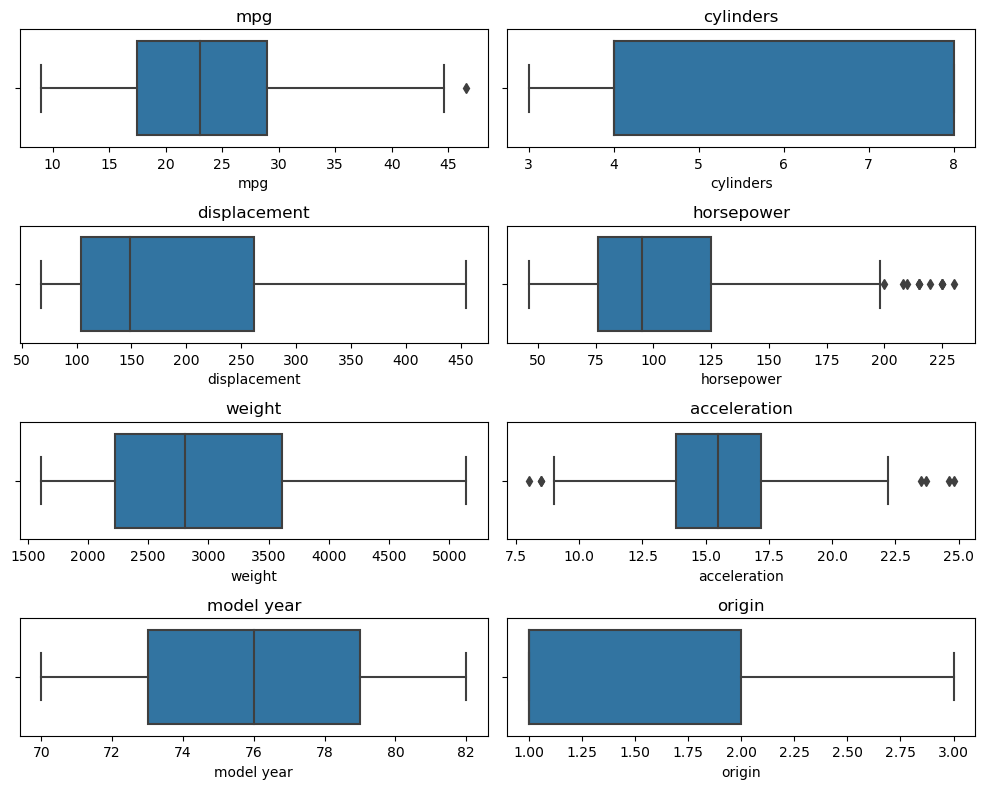

In [59]:
fig, axes = plt.subplots(4, 2, figsize=(10, 8))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
plt.tight_layout()
plt.show()

There are no outliers.

### Feature Engineering

In [16]:
df["car name"].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

We have 305 different car names, so that means we can generate new features like "brand" and "model"

In [17]:
def split_car_name(car_name):
    split_name = car_name.split(' ', 1)
    brand = split_name[0]
    model = split_name[1] if len(split_name) > 1 else ''
    return pd.Series([brand, model])

df[['brand', 'model']] = df['car name'].apply(split_car_name)

In [18]:
df.drop(columns=["car name"], inplace=True)

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,model
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford,torino


In [20]:
df["model"].value_counts()

model
pinto         6
rabbit        5
maverick      5
corolla       5
matador       5
             ..
monza 2+2     1
mustang ii    1
astro         1
pacer         1
s-10          1
Name: count, Length: 300, dtype: int64

In [21]:
df["brand"].value_counts().head()

brand
ford         51
chevrolet    43
plymouth     31
amc          28
dodge        28
Name: count, dtype: int64

## Analyzing Relationships

In [22]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
brand            object
model            object
dtype: object

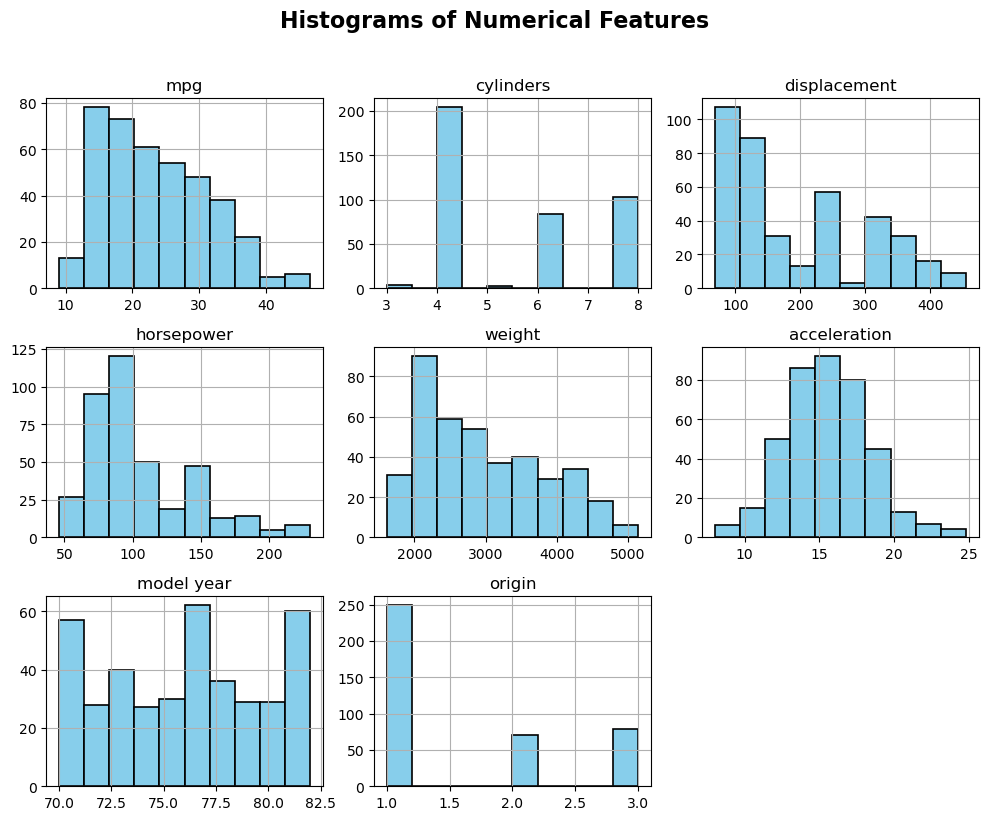

In [58]:
df.select_dtypes(include=["int64", "float64"]).hist(figsize=(10, 8), color='skyblue', edgecolor='black', linewidth=1.2)
plt.suptitle('Histograms of Numerical Features', fontsize=16, fontweight='bold', y=1.02)  # Add a title
plt.tight_layout()
plt.show()

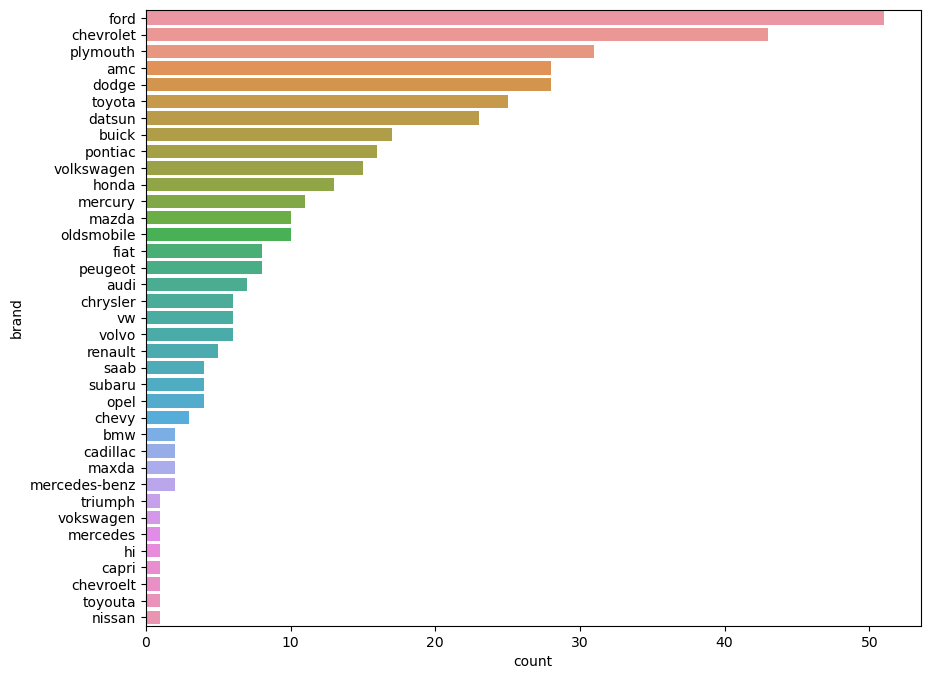

In [57]:
plt.figure(figsize=(10, 8))
sns.countplot(y="brand", data=df, order=df["brand"].value_counts().index)
plt.show()

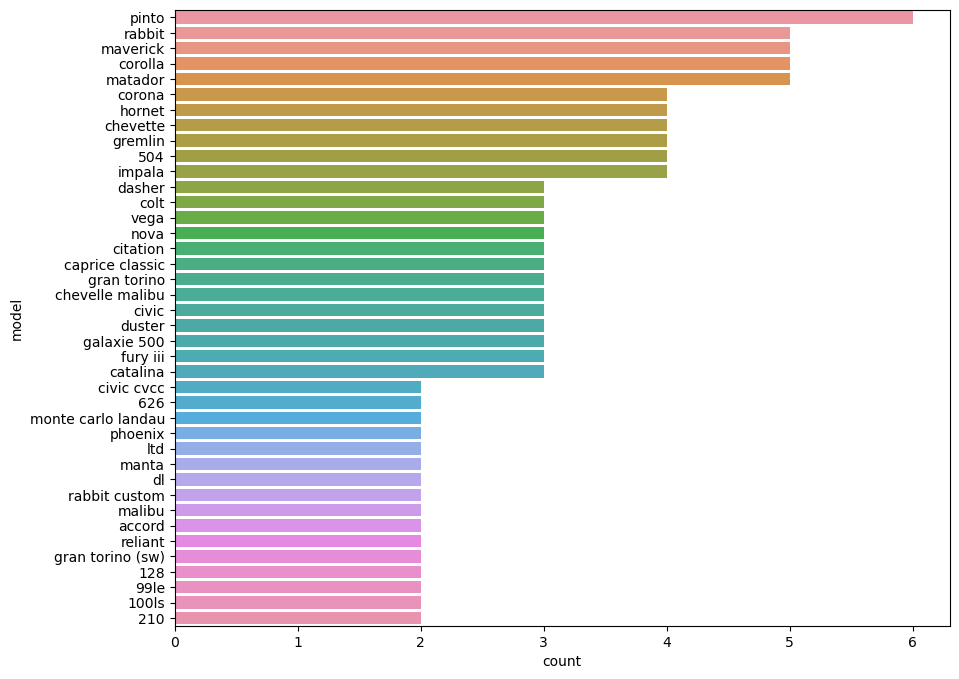

In [56]:
plt.figure(figsize=(10, 8))
sns.countplot(y="model", data=df, order=df["model"].value_counts().nlargest(40).index)
plt.show()

In [43]:
# Correlation

corr_matrix = df.select_dtypes(include=["int64", "float64"]).corr()
corr_mpg = corr_matrix["mpg"].sort_values(ascending=False)
corr_mpg

mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64

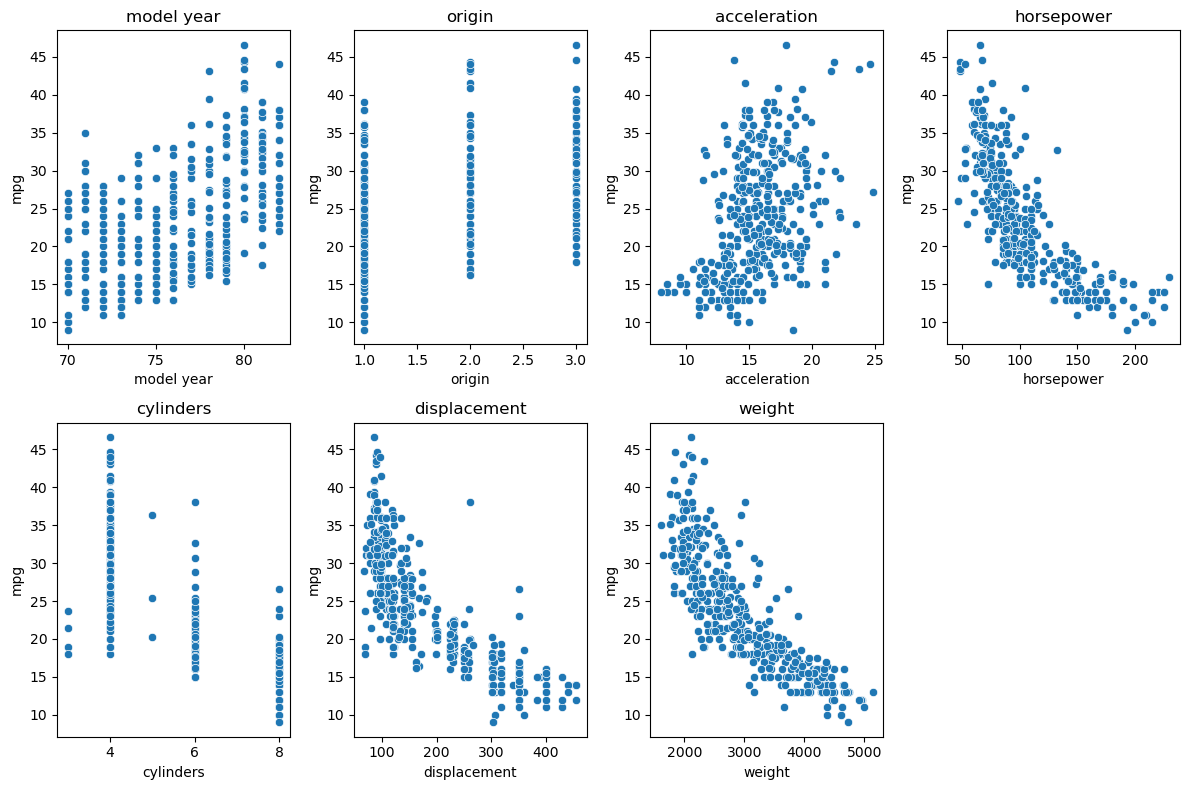

In [54]:
columns = corr_mpg.index[corr_mpg.index != "mpg"]

fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=column, y="mpg", ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(column)
    
for i in range(len(columns), 2 * 4):
    fig.delaxes(axes[i // 4, i % 4])
    
plt.tight_layout()
plt.show()

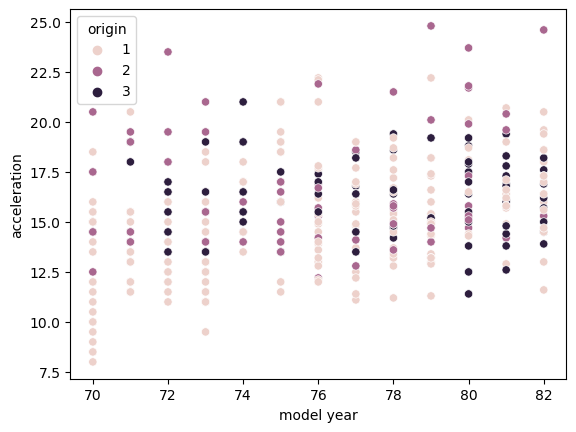

In [67]:
sns.scatterplot(data=df, x="model year", y="acceleration", hue="origin")
plt.show()

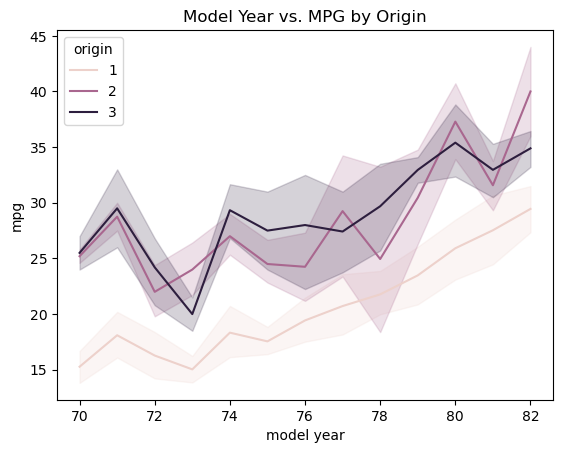

In [76]:
sns.lineplot(data=df, x="model year", y="mpg", hue="origin")

plt.title("Model Year vs. MPG by Origin")
plt.show()

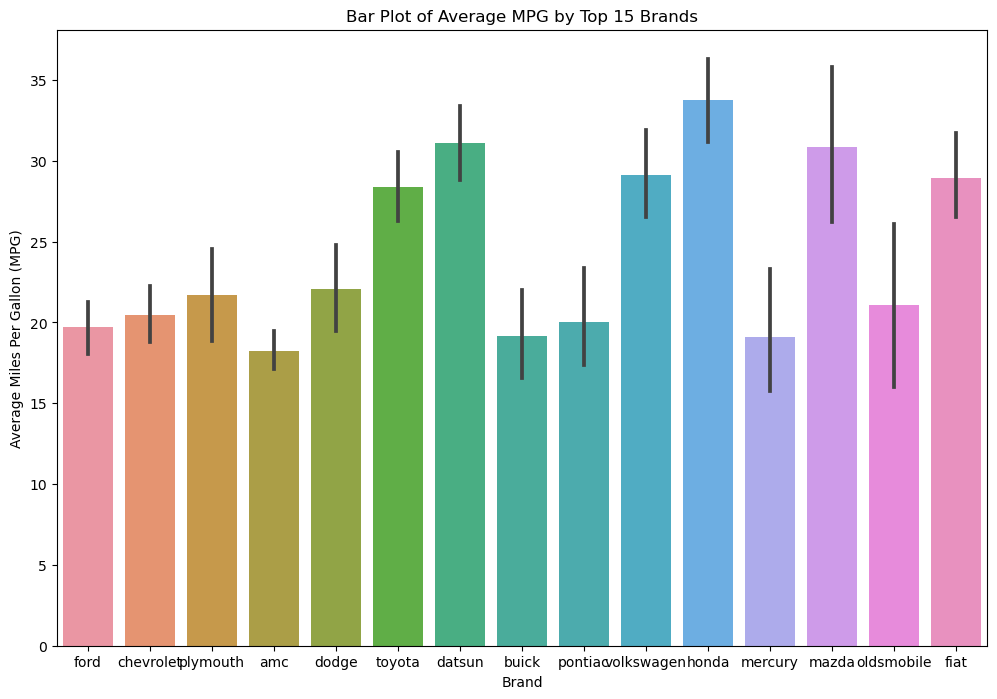

In [108]:
# Top 5 Brands
top_brands = df["brand"].value_counts().nlargest(15).index

filtered_df = df[df["brand"].isin(top_brands)]

plt.figure(figsize=(12, 8))
sns.barplot(x='brand', y='mpg', data=filtered_df, estimator='mean', order=top_brands)
plt.title('Bar Plot of Average MPG by Top 15 Brands')
plt.xlabel('Brand')
plt.ylabel('Average Miles Per Gallon (MPG)')
plt.show()

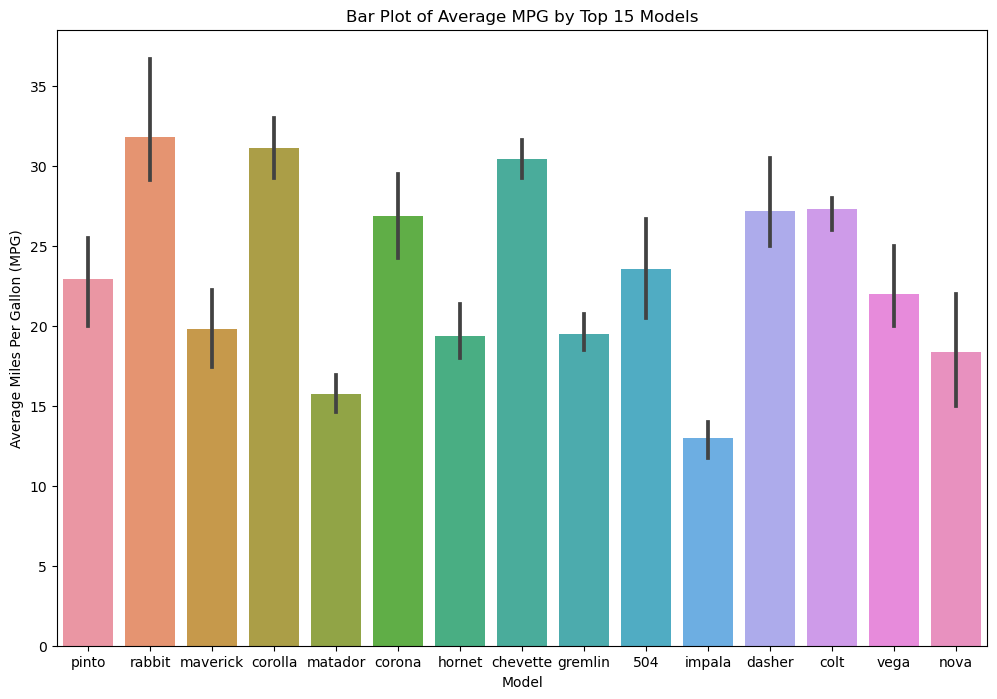

In [109]:
# Top 15 Models
top_models = df["model"].value_counts().nlargest(15).index

filtered_df = df[df["model"].isin(top_models)]

plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='mpg', data=filtered_df, estimator='mean', order=top_models)
plt.title('Bar Plot of Average MPG by Top 15 Models')
plt.xlabel('Model')
plt.ylabel('Average Miles Per Gallon (MPG)')
plt.show()